In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import yfinance as yf
from pmdarima import auto_arima
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import os
import sys
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
stock_symbol = "NVDA"
start_date = "2019-01-01"
end_date = "2020-03-31"


In [72]:
series = yf.download(stock_symbol, start=start_date, end=end_date, interval='1d' ,progress=False)

In [73]:
series.index = series.index.to_period('M')

# Split the data into train and test sets
X = series['Adj Close'].values  # Assuming 'Adj Close' is the column you want to use
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [74]:
expected_values = [] 
for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 0))
    
    # Suppress ARIMA model output by redirecting stdout and stderr
    with open(os.devnull, 'w') as devnull:
        old_stdout, old_stderr = sys.stdout, sys.stderr
        sys.stdout, sys.stderr = devnull, devnull
        model_fit = model.fit()
        sys.stdout, sys.stderr = old_stdout, old_stderr
    
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    expected_values.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    

predicted=49.254002, expected=50.902878
predicted=50.762995, expected=51.462826
predicted=51.280767, expected=50.499722
predicted=50.400621, expected=50.519627
predicted=50.779341, expected=50.026871
predicted=49.942001, expected=50.417587
predicted=50.306594, expected=52.386124
predicted=52.505725, expected=52.164627
predicted=51.894131, expected=51.671879
predicted=51.673976, expected=51.848572
predicted=52.092949, expected=51.709202
predicted=51.519218, expected=51.808750
predicted=51.782879, expected=52.164627
predicted=52.228372, expected=51.905807
predicted=51.831428, expected=52.209415
predicted=52.246749, expected=50.815777
predicted=50.802369, expected=52.829098
predicted=52.900871, expected=51.761467
predicted=51.716996, expected=52.555332
predicted=52.341405, expected=52.306480
predicted=52.639533, expected=52.483177
predicted=52.180644, expected=55.051464
predicted=55.162762, expected=54.003738
predicted=53.741809, expected=54.352406
predicted=54.334428, expected=53.978832


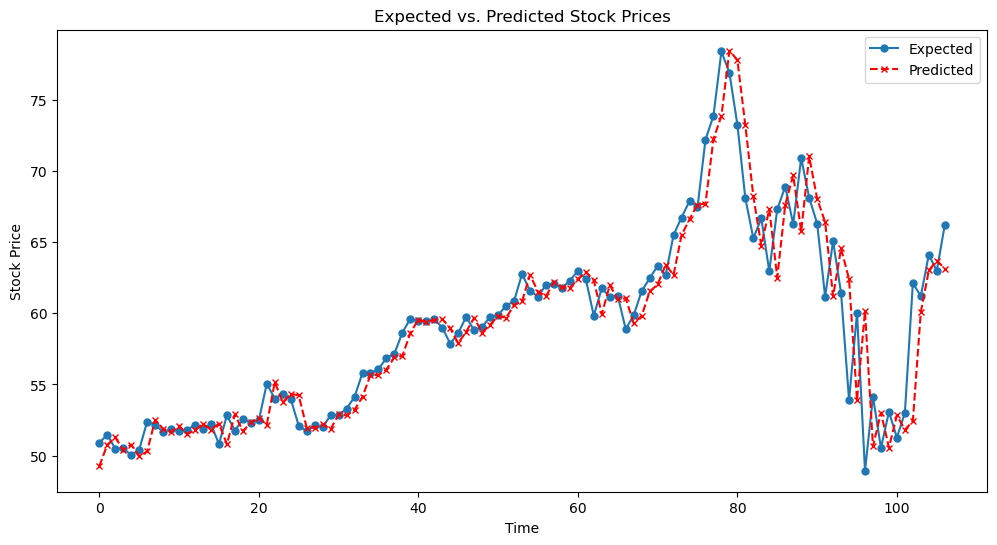

In [75]:
plt.figure(figsize=(12, 6))
plt.plot(expected_values, label='Expected', marker='o', linestyle='-', markersize=5)
plt.plot(predictions, color='red', label='Predicted', marker='x', linestyle='--', markersize=5)
plt.title('Expected vs. Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [76]:
stock_symbol = "NVDA"
start_date = "2019-01-01"
end_date = "2020-03-31"


In [77]:
series = yf.download(stock_symbol, start=start_date, end=end_date, interval='1d' ,progress=False)

In [78]:
series['Days'] = (series.index - series.index[0]).days

In [79]:
X = series[['Days']].values
y = series['Adj Close'].values

# Determine the split point between train and test data
split_ratio = 0.66
split_index = int(len(X) * split_ratio)

In [80]:
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

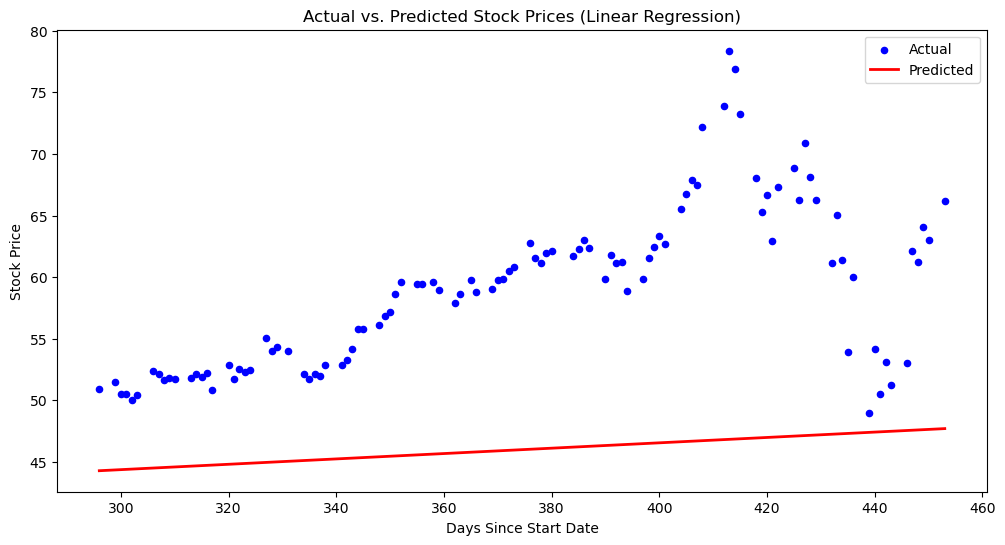

In [81]:
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual', marker='o', s=20)
plt.plot(X_test, y_pred, color='red', label='Predicted', linewidth=2)
plt.title('Actual vs. Predicted Stock Prices (Linear Regression)')
plt.xlabel('Days Since Start Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [82]:
stock_symbol = "NVDA"
start_date = "2019-01-01"
end_date = "2020-03-31"

In [83]:
series = yf.download(stock_symbol, start=start_date, end=end_date, interval='1d', progress=False)



In [84]:
series['SMA_50'] = series['Adj Close'].rolling(window=50).mean()
series['SMA_200'] = series['Adj Close'].rolling(window=200).mean()
series['Volume_Mean'] = series['Volume'].rolling(window=5).mean()
series['Daily_Return'] = series['Adj Close'].pct_change()

In [85]:
series = series.dropna(subset=['SMA_50', 'SMA_200', 'Volume_Mean', 'Daily_Return'])

# Create the target variable (next day's return)
series['Target'] = series['Daily_Return'].shift(-1)

# Impute missing values in the target variable using mean
series['Target'].fillna(series['Target'].mean(), inplace=True)

# Split the data into features (X) and target (y)
X = series[['SMA_50', 'SMA_200', 'Volume_Mean']].values
y = series['Target'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.002454216777095225
R-squared: -0.4098283722842242


/var/folders/wd/1zpz59ds2tj5vqsw7jd8xf_m0000gn/T/ipykernel_8895/3943794899.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series['Target'] = series['Daily_Return'].shift(-1)
/var/folders/wd/1zpz59ds2tj5vqsw7jd8xf_m0000gn/T/ipykernel_8895/3943794899.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series['Target'].fillna(series['Target'].mean(), inplace=True)


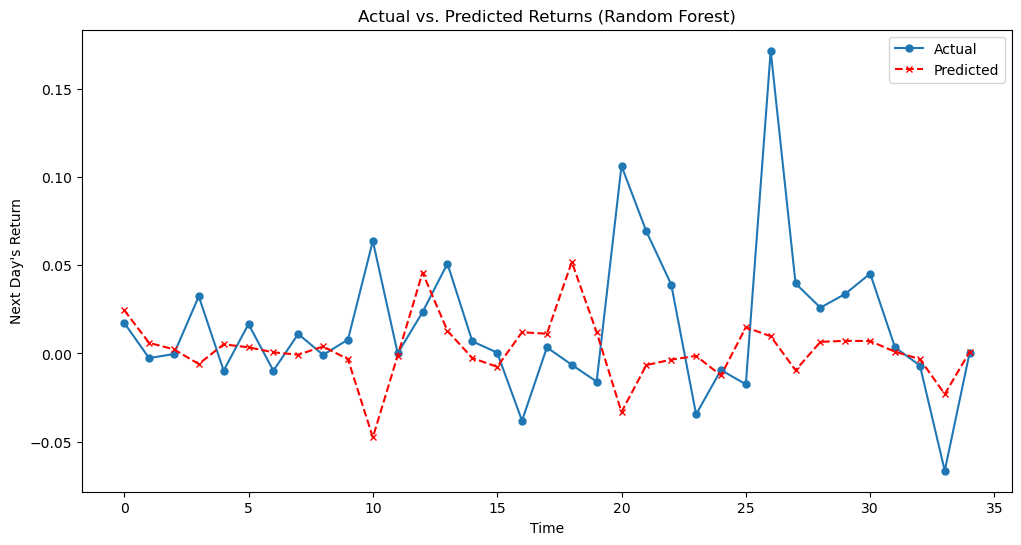

In [86]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', marker='o', linestyle='-', markersize=5)
plt.plot(y_pred, color='red', label='Predicted', marker='x', linestyle='--', markersize=5)
plt.title('Actual vs. Predicted Returns (Random Forest)')
plt.xlabel('Time')
plt.ylabel('Next Day\'s Return')
plt.legend()
plt.show()